
# How to deal with imbalanced data

(1) Use the right evaluation metrics: 

     - Applying inappropriate evaluation metrics for a model generated using imbalanced data can be dangerous. 
     - Accuracy is not the metric to use when working with an imbalanced dataset. We have seen that it is misleading.
     - There are metrics that have been designed to tell you a more truthful story when working with imbalanced classes.
     - In the case of unbalanced datasets, other alternative evaluation metrics can be applied such as:
        - Precision
        - Recall
        - F1 score
        - AUC (also known as "roc_auc" in sklearn)
    
AND you can use one of the following (or none of them):
    
(2) Downsampling your data: (not always the best option)
    You can change the dataset that you use to build your predictive model to have more balanced data. See the code below.

(3) Use, when available, the parameter class_weight = 'balanced' of sklearn (not always the best option).
    

In [1]:
#IMPORT DATA
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


target
0    500
1    268
dtype: int64


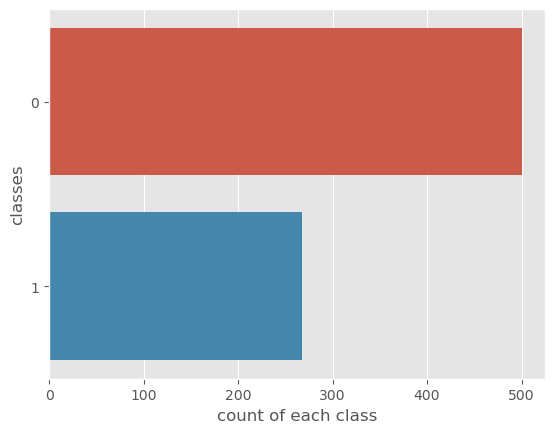

In [2]:
#Print class freq. through pandas 
print(df.groupby('target').size()) #"target" is the name of the target column, change it accordingly to your dataset
#!pip install seaborn

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df.target ,data=df) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

- Purpose: This line groups the DataFrame `df` by the `target` column and counts the number of occurrences for each class (0 for non-diabetic and 1 for diabetic).
- Output: It will print the count of each class, showing how many patients are diabetic and how many are not.
- Imports:
    - `matplotlib.pyplot`: A plotting library used for creating static, animated, and interactive visualizations in Python.
    - `seaborn`: A statistical data visualization library based on Matplotlib, which provides a high-level interface for drawing attractive graphics.
- Inline Matplotlib: `%matplotlib inline` is a Jupyter Notebook magic command that allows you to display plots inline within the notebook.
- Plot Style: `plt.style.use('ggplot')` sets the plot style to resemble the ggplot2 style used in R, providing a cleaner aesthetic for your visualizations.
- `sns.countplot`: This function creates a count plot (bar chart) that displays the count of observations in each categorical bin using bars.
    - `y=df.target`: Specifies that the target variable will be displayed on the y-axis.
    - `data=df`: Specifies the DataFrame to use for the plot.
- Labels:
    - `plt.xlabel("count of each class")`: Sets the x-axis label.
    - `plt.ylabel("classes")`: Sets the y-axis label.
- `plt.show()`: This line displays the plot.

In [3]:
import numpy as np
from sklearn.metrics import accuracy_score

y=df['target']
y_pred=np.zeros(len(y))

accuracy_score(y, y_pred)


0.6510416666666666

- `numpy`: This library is used for numerical operations in Python. Here, it is used to create an array of predictions.
- `accuracy_score`: This function computes the accuracy of the predicted labels compared to the true labels.
- `y`: This variable holds the true labels from the DataFrame `df`. It contains the values of the `target` column, which indicates whether each patient has diabetes (1) or not (0).
- `y_pred`: This variable creates an array of zeros with the same length as `y`. In this case, it means that the model predicts that all patients do not have diabetes.
- `np.zeros(len(y))`: This function generates an array filled with zeros. Since len(y) is the number of observations (patients) in your dataset, this will create a prediction array of zeros with the same size as the true labels.
- `accuracy_score(y, y_pred)`: This function computes the accuracy of the predictions. Accuracy is defined as the ratio of correctly predicted observations to the total observations.
- The formula for accuracy is:

\begin{equation}
\text { Accuracy }=\frac{\text { Number of Correct Predictions }}{\text { Total Predictions }}
\end{equation}

### Expected Output
- The model predicts that all patients do not have diabetes (all predictions are 0). Therefore, the accuracy will depend on the proportion of non-diabetic patients in the dataset.
- For example, if the dataset has 500 non-diabetic patients and 268 diabetic patients, the accuracy would be:

\begin{equation}
\text { Accuracy }=\frac{500}{500+268} \approx 0.65 \quad(\text { or } 65 \%)
\end{equation}

In [4]:
df.head()

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timespreg  768 non-null    int64  
 1   gluctol    768 non-null    int64  
 2   diaspb     768 non-null    int64  
 3   triceps    768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   massindex  768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The `df.info()` method in Pandas provides a concise summary of a DataFrame. This summary includes essential information about the DataFrame, such as:
- The number of rows and columns.
- The data types of each column.
- The number of non-null values in each column.
- The memory usage of the DataFrame.

In [6]:
df.describe()

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The `df.describe()` method in Pandas provides a summary of the statistical properties of the numerical columns in a DataFrame. This method is particularly useful for getting a quick overview of the data distribution and understanding the central tendency, variability, and shape of the dataset.

## Downsampling

In [7]:
from sklearn.utils import resample #This imports the resample function from sklearn.utils, which is used for resampling datasets.

#Down-sample Majority Class
#1) Separate majority and minority classes
# Majority class (non-diabetic)
df_majority = df[df.target==0] #"target" is the name of the target column, change it accordingly to your dataset 
df_majority 

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [8]:
# Minority class (diabetic)
df_minority = df[df.target==1] #"target" is the name of the target column, change it accordingly to your dataset
df_minority

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [9]:
#2) Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,
                                   n_samples=268,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
df_majority_downsampled
#Parameters:
#    replace=False: This indicates that we want to sample without replacement, meaning the same instance can't be chosen more than once.
#    n_samples=268: This specifies the number of samples we want from the majority class, set to match the number of instances in the minority class.
#    random_state=123: This ensures that the results are reproducible; using the same random state will give you the same downsampled results every time you run the code. 

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
372,0,84,64,22,66,35.8,0.545,21,0
525,3,87,60,18,0,21.8,0.444,21,0
512,9,91,68,0,0,24.2,0.200,58,0
633,1,128,82,17,183,27.5,0.115,22,0
486,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
97,1,71,48,18,76,20.4,0.323,22,0
167,4,120,68,0,0,29.6,0.709,34,0
717,10,94,72,18,0,23.1,0.595,56,0
76,7,62,78,0,0,32.6,0.391,41,0


In [10]:
#3) Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled
# This line concatenates the downsampled majority class and the minority class into 
# a new DataFrame called df_downsampled. 
# This combined DataFrame now has a balanced number of samples from both classes.

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
372,0,84,64,22,66,35.8,0.545,21,0
525,3,87,60,18,0,21.8,0.444,21,0
512,9,91,68,0,0,24.2,0.200,58,0
633,1,128,82,17,183,27.5,0.115,22,0
486,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [11]:
#4) Display new class counts
df_downsampled.target.value_counts() #"target" is the name of the target column, change it accordingly to your dataset

#df_downsampled.target.value_counts() will display the count of each class 
#in the target column of your downsampled DataFrame, df_downsampled. 
#This is useful for verifying that the downsampling process was successful 
#and that the class distribution is balanced.

0    268
1    268
Name: target, dtype: int64

The code above is a method to balance the classes in a dataset by down-sampling the majority class. This technique is useful in situations where one class (e.g., non-diabetic patients) significantly outnumbers another (e.g., diabetic patients).

## Oversampling

In [12]:
from sklearn.utils import resample

#Over-sample Minority Class
#1) Separate majority and minority classes
df_majority = df[df.target==0] #"target" is the name of the target column, change it accordingly to your dataset
df_majority

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [13]:
df_minority = df[df.target==1] #"target" is the name of the target column, change it accordingly to your dataset
df_minority 

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [14]:
#2) Oversample minority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=500,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
df_minority_oversampled

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
259,11,155,76,28,150,33.3,1.353,51,1
667,10,111,70,27,0,27.5,0.141,40,1
26,7,147,76,0,0,39.4,0.257,43,1
219,5,112,66,0,0,37.8,0.261,41,1
283,7,161,86,0,0,30.4,0.165,47,1
...,...,...,...,...,...,...,...,...,...
429,1,95,82,25,180,35.0,0.233,43,1
701,6,125,78,31,0,27.6,0.565,49,1
476,2,105,80,45,191,33.7,0.711,29,1
579,2,197,70,99,0,34.7,0.575,62,1


In [15]:
#3) Combine oversampled minority class with majority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
df_oversampled

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
259,11,155,76,28,150,33.3,1.353,51,1
667,10,111,70,27,0,27.5,0.141,40,1
26,7,147,76,0,0,39.4,0.257,43,1
219,5,112,66,0,0,37.8,0.261,41,1
283,7,161,86,0,0,30.4,0.165,47,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [16]:
#4) Display new class counts
df_oversampled.target.value_counts() #"target" is the name of the target column, change it accordingly to your dataset

1    500
0    500
Name: target, dtype: int64

### SMOTE

SMOTE (Synthetic Minority Oversampling Technique)

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
smote = SMOTE(random_state=42)

In [19]:
X_minority = df.drop(columns=['target'])
y_minority = df['target']

X_minority_smote, y_minority_smote = smote.fit_resample(X_minority, y_minority)

In [20]:
df['target'].value_counts()

0    500
1    268
Name: target, dtype: int64

In [21]:
y_minority_smote.value_counts()

1    500
0    500
Name: target, dtype: int64